In [ ]:
import numpy as np
import scipy
import xgboost
from xgboost import XGBRegressor
import math
import matplotlib.pyplot as plt
import matplotlib as mpl


import time
import pickle
import keras# check scikit-learn version

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestRegressor

from skimage.metrics import structural_similarity as ssim

In [ ]:
from tensorflow import keras

from tensorflow.keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D,Cropping2D,TimeDistributed, AveragePooling2D,Dense,Flatten,Reshape,Dropout,LSTM,LeakyReLU,RepeatVector,Conv2DTranspose
from tensorflow.keras.models import Model,Sequential


import numpy as np
import scipy
import math
import matplotlib.pyplot as plt

import numpy as np

from PIL import Image

import tensorflow as tf
from tensorflow import keras
#import keras
import time

In [ ]:
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
method = 'contrastive'


field_data = np.load('drive/MyDrive/CA_contrastive/data/all_fire_Chimney_field_25fire_tight.npy')
field_data = field_data/np.max(field_data)


parameter_input = np.load('drive/MyDrive/CA_contrastive/data/parameter_data_Chimney_25fire_tight.npy')

latent_output = np.load('drive/MyDrive/CA_contrastive/data/'+method+'128_latent_Chimney_30_25fire_tight.npy')


In [ ]:
field_data = field_data.reshape(125,50,128,128)

In [ ]:
#order = list(np.random.permutation(125))
#np.save('drive/MyDrive/CA_contrastive/data/random_order.npy',order)

In [ ]:
np.random.seed(0)
order = list(np.load('drive/MyDrive/CA_contrastive/data/random_order.npy'))

latent_output = latent_output.reshape(125,50,30)
latent_output = latent_output[order,:,:]
field_data = field_data[order,:,:,:]

In [ ]:
train_input = np.zeros((4000,30))
train_output = np.zeros((4000,30))

train_index = 0
for i in range(100):
  for iter in range(40):
    train_input[train_index,:] = latent_output[i,iter,:]
    train_output[train_index,:] = latent_output[i,iter+10,:]
    train_index += 1


test_input = np.zeros((1000,30))
test_output = np.zeros((1000,30))
test_list = []
test_index = 0
for i in range(100,125):
  for iter in range(40):
    test_input[test_index,:] = latent_output[i,iter,:]
    test_output[test_index,:] = latent_output[i,iter+10,:]
    test_list.append([i,iter+10])
    test_index += 1

In [ ]:
train_input.shape

(4000, 30)

In [ ]:
GB_model = XGBRegressor()

GB_model.fit(train_input, train_output)

test_prediction = GB_model.predict(test_input)

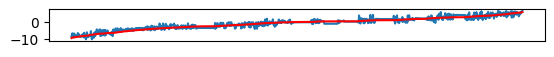

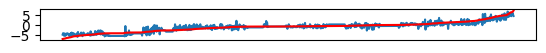

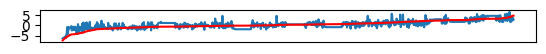

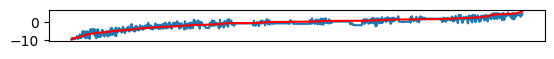

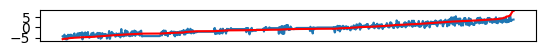

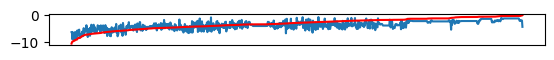

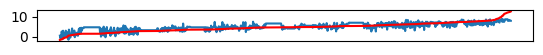

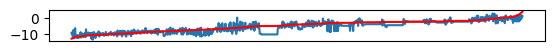

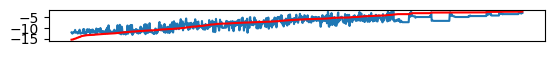

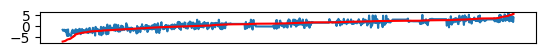

In [ ]:
from matplotlib.pyplot import figure
from sklearn.metrics import r2_score

#plt.figure(figsize=(14,6))
for index in range(10):
  plt.subplot(10, 1, index+1)
  s = list(test_output[:,index])

  deg1 = test_output[:,index][sorted(range(len(s)), key=lambda k: s[k])]

  deg2 = test_prediction[:,index][sorted(range(len(s)), key=lambda k: s[k])]

  #print('R2',r2_score(deg1,deg2))

  plt.plot(deg2,label = "model")
  plt.plot(deg1,'r',label = "true")
  #plt.legend()
  plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
  plt.show()

# load encoder decoder

In [ ]:
if method == 'CAE':

  encoder = keras.models.load_model('drive/MyDrive/CA_contrastive/model/CAE_encoder_Chimney_30_25fire_tight.h5')
  decoder = keras.models.load_model('drive/MyDrive/CA_contrastive/model/CAE_decoder_Chimney_30_25fire_tight.h5')


if method == 'contrastive':
  encoder = keras.models.load_model('drive/MyDrive/CA_contrastive/model/CAE_encoder_contrastive_Chimney_30_25fire_tight.h5')
  decoder = keras.models.load_model('drive/MyDrive/CA_contrastive/model/CAE_decoder_contrastive_Chimney_30_25fire_tight.h5')


In [ ]:
field_prediction = decoder.predict(test_prediction.reshape(-1, 30,1))
field_test = decoder.predict(test_output.reshape(-1, 30,1))

32/32 [==============================] - 7s 210ms/step


In [ ]:
field_test.shape

(1000, 128, 128, 1)

In [ ]:
if method =='CAE':
  relative_error = np.linalg.norm(field_prediction[:,:,:,0]-field_test[:,:,:,0])

  ssim_list = []

  for i in range(1000):
    ssim_list.append(ssim(field_test[i,:,:,0], field_prediction[i,:,:,0]))

  mean_SSIM = (np.mean(np.array(ssim_list)))

  print('relative_error',relative_error)

  print('mean_SSIM',mean_SSIM)

In [ ]:
if method =='contrastive':
  relative_error = np.linalg.norm(field_prediction[:,:,:,0]-field_test[:,:,:,0])

  ssim_list = []

  for i in range(1000):
    ssim_list.append(ssim(field_test[i,:,:,0], field_prediction[i,:,:,0]))

  mean_SSIM = (np.mean(np.array(ssim_list)))

  print('relative_error',relative_error)

  print('mean_SSIM',mean_SSIM)

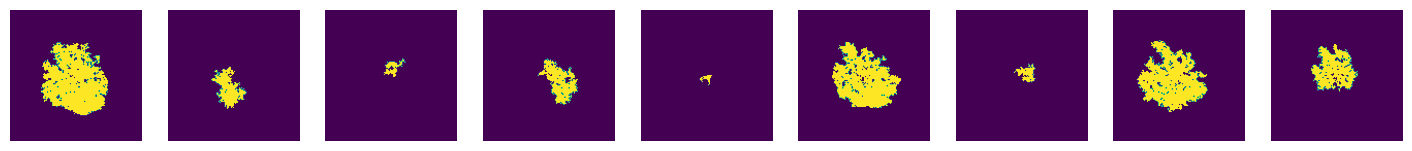

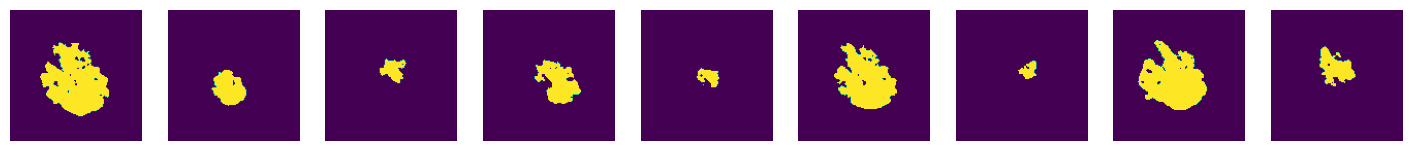

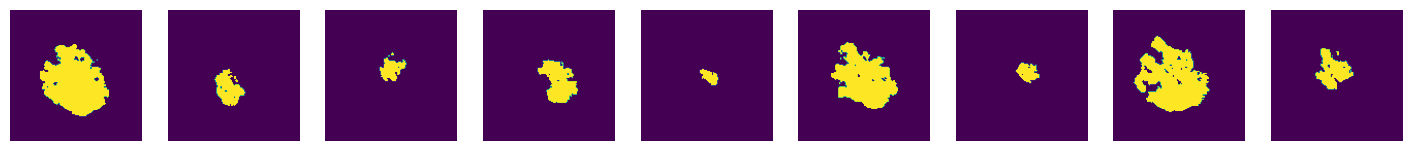

In [ ]:
if method =='contrastive':

  from matplotlib.pyplot import figure

  plt.figure(figsize=(20,9))

  for i in range(1,10):
    a = test_list[49+i*63][0]
    b = test_list[49+i*63][1]
    plt.subplot(1, 10, i)
    plt.imshow(field_data[a,b,:,:])
    plt.axis('off')

  plt.figure(figsize=(20,9))
  for i in range(1,10):
    plt.subplot(1, 10, i)
    plt.imshow(field_prediction_CAE[49+i*63,:,:,0])
    plt.axis('off')

  plt.figure(figsize=(20,9))
  for i in range(1,10):
    plt.subplot(1, 10, i)
    plt.imshow(field_prediction[49+i*63,:,:,0])
    plt.axis('off')


# plot the training curves

In [ ]:
np.max(field_prediction_CAE)

0.99998987

In [ ]:
#field_prediction_CAE = field_prediction

field_prediction_CAE[field_prediction_CAE<=0.5] = 0
field_prediction_CAE[field_prediction_CAE>=0.5] = 1

field_prediction[field_prediction<=0.5] = 0
field_prediction[field_prediction>=0.5] = 1

In [ ]:
  cmap = mpl.colors.ListedColormap(['orange','yellow', 'green', 'black'])
  cmap.set_over('0.25')
  cmap.set_under('0.75')
  bounds = [1.0, 2.02, 2.27, 3.5, 5.1]
  norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

In [ ]:
###################################################################################
#test with real map
forest = Image.open('drive/MyDrive/CA/land_data/canopy_Chimney_2016.tif')

ignition = np.loadtxt('drive/MyDrive/CA/land_data/Chimney_2016_ignition_forest2.txt')

altitude = Image.open('drive/MyDrive/CA/land_data/slope_Chimney_2016.tif')

#fuel = Image.open('images/fuel_Ferguson_2018.tif')

density = Image.open('drive/MyDrive/CA/land_data/density_Chimney_2016.tif')

###################################################################################

In [ ]:
forest = np.array(forest)

altitude = np.array(altitude)/np.max(altitude)

density = np.array(density)

density = np.round(density/np.max(density))

forest[forest<-999.] = 0.

forest = forest/np.max(forest)


from PIL import Image
from skimage.transform import resize

forest = resize(forest, (128, 128))
altitude = resize(altitude, (128, 128))
density = resize(density, (128, 128))


#forest = resize(forest, (128*4, 128*4))
#altitude = resize(altitude, (128*4, 128*4))
#density = resize(density, (128*4, 128*4))

density = np.round(density/np.max(density))

n_row = forest.shape[0]
n_col = forest.shape[1]

number_MC = 20
#################################################################
generation = 501
n_row = forest.shape[0]
n_col = forest.shape[1]

In [ ]:
field_prediction_CAE[field_prediction_CAE==0] = 2
field_prediction_CAE[field_prediction_CAE==1] = 4

field_prediction[field_prediction==0] = 2
field_prediction[field_prediction==1] = 4

In [ ]:
field_data[field_data==0] = 2
field_data[field_data==1] = 4

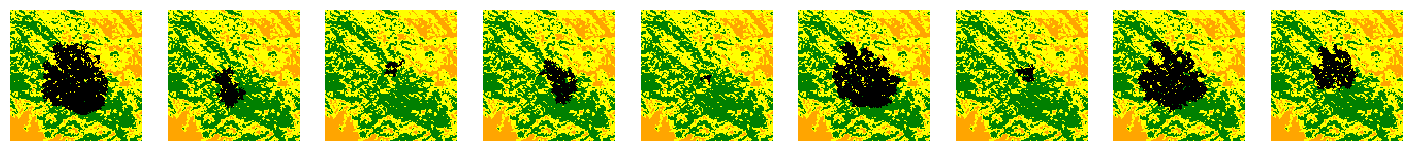

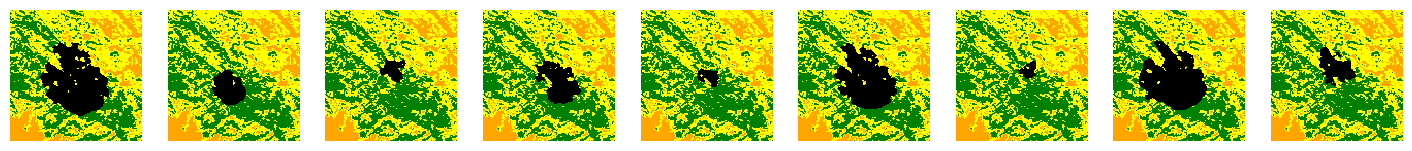

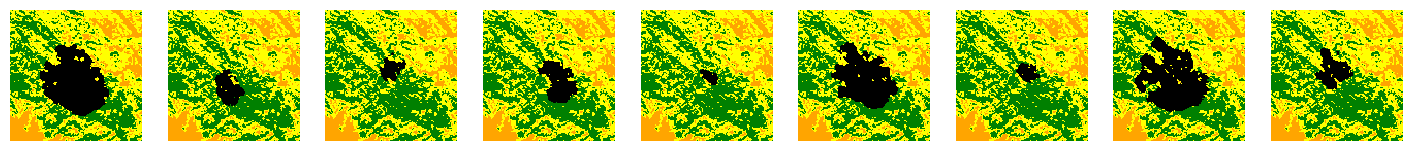

In [ ]:
if method =='contrastive':

  from matplotlib.pyplot import figure

  plt.figure(figsize=(20,9))

  for i in range(1,10):
    a = test_list[49+i*63][0]
    b = test_list[49+i*63][1]
    plt.subplot(1, 10, i)
    plt.imshow(forest + field_data[a,b,:,:],  cmap = cmap,norm = norm, interpolation="none" )
    plt.axis('off')

  plt.figure(figsize=(20,9))
  for i in range(1,10):
    plt.subplot(1, 10, i)
    plt.imshow(forest + field_prediction_CAE[49+i*63,:,:,0],  cmap = cmap,norm = norm, interpolation="none" )
    plt.axis('off')

  plt.figure(figsize=(20,9))
  for i in range(1,10):
    plt.subplot(1, 10, i)
    plt.imshow(forest + field_prediction[49+i*63,:,:,0],  cmap = cmap,norm = norm, interpolation="none" )
    plt.axis('off')


# plot the fire field

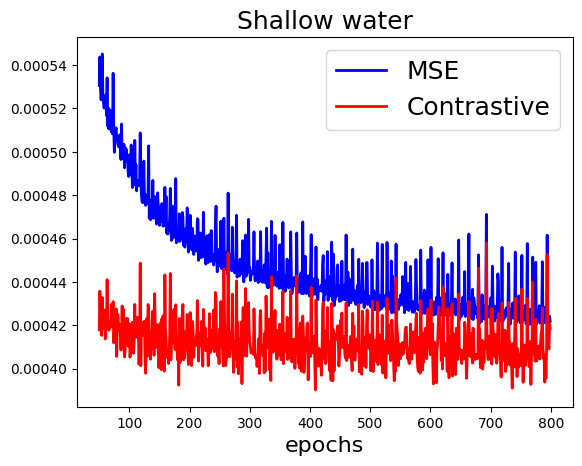

In [ ]:
MSE_loss = np.load('drive/MyDrive/SW_contrastive/data/SW_MSE_loss_final.npy')
CL_loss = np.load('drive/MyDrive/SW_contrastive/data/SW_CL_loss_final.npy')


plt.plot(list(range(50,800)),MSE_loss[50:]*0.99,'b',label = 'MSE',linewidth = 2)

plt.plot(list(range(50,800)),CL_loss[50:]*0.01,'r',label = 'Contrastive',linewidth = 2)
plt.xlabel('epochs',fontsize=16)
plt.legend(fontsize=18)
plt.title('Shallow water',fontsize=18)

plt.savefig('drive/MyDrive/CA_contrastive/image/SW_loss_final.pdf',bbox_inches='tight')

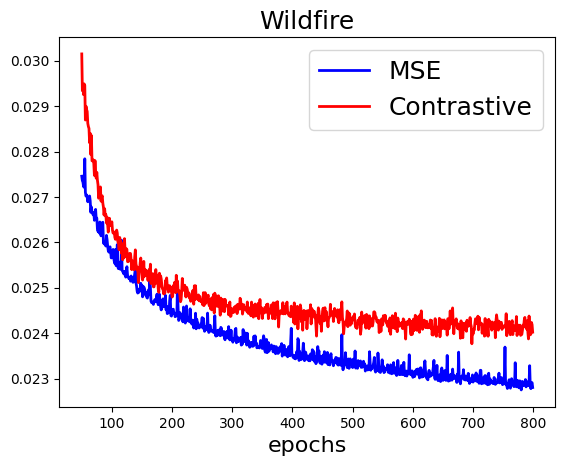

In [ ]:
MSE_loss = np.load('drive/MyDrive/CA_contrastive/data/CA_MSE_loss_final.npy')
CL_loss = np.load('drive/MyDrive/CA_contrastive/data/CA_CL_loss_final.npy')

plt.plot(list(range(50,800)),MSE_loss[50:]*0.99,'b',label = 'MSE',linewidth = 2)

plt.plot(list(range(50,800)),CL_loss[50:]*0.01,'r',label = 'Contrastive',linewidth = 2)


plt.legend(fontsize=18)
plt.xlabel('epochs',fontsize=16)
plt.title('Wildfire',fontsize=18)
plt.savefig('drive/MyDrive/CA_contrastive/image/fire_loss_final.pdf',bbox_inches='tight')